### Importando bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

### Função de Suporte



### Carregando Dataset

In [4]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target
y[(y == 1) | (y == 2)] = 1

### Holdout e Normalização

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Código para Regressão Logística

In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def gradient_descent(X, y, w, learning_rate, num_iterations):
    n_samples, n_features = X.shape

    for _ in range(num_iterations):
        y_pred = np.dot(X, w)
        h = sigmoid(y_pred)
        gradient = -1/n_samples * np.dot(X.T, (y - h))
        w -= learning_rate * gradient

    return w

def cross_entropy_loss(w, X, y):
    m = len(y)
    y_pred = np.dot(X, w)
    h = sigmoid(y_pred)
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

def logistic_regression(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features)
    loss_history = []

    for _ in range(num_iterations):
        w = gradient_descent(X, y, w, learning_rate, 1)
        loss = cross_entropy_loss(w, X, y)
        loss_history.append(loss)

    return w, loss_history

def predict(X, weights, threshold=0.4):
    y_pred = np.dot(X, weights)
    y_pred = sigmoid(y_pred)
    return (y_pred >= threshold).astype(int)

In [38]:
learning_rate = 0.1
num_iterations = 1000

weights, loss_history = logistic_regression(X_train, y_train, learning_rate, num_iterations)

print("Histórico de Perda (Loss History):")
for i, loss in enumerate(loss_history):
    print(f"Iteração {i + 1}: Loss = {loss}")

print("Pesos (Coefficients):", weights)

y_pred = predict(X_test, weights)

Histórico de Perda (Loss History):
Iteração 1: Loss = 1.2031725415443009
Iteração 2: Loss = 1.1270971983940816
Iteração 3: Loss = 1.056755710120175
Iteração 4: Loss = 0.9920243952775382
Iteração 5: Loss = 0.9327011547950046
Iteração 6: Loss = 0.8785200141623525
Iteração 7: Loss = 0.8291679269703927
Iteração 8: Loss = 0.7843018394054447
Iteração 9: Loss = 0.7435644027808966
Iteração 10: Loss = 0.7065972816228765
Iteração 11: Loss = 0.6730515715238907
Iteração 12: Loss = 0.6425953019962736
Iteração 13: Loss = 0.6149183085980604
Iteração 14: Loss = 0.5897349204128072
Iteração 15: Loss = 0.5667849559876847
Iteração 16: Loss = 0.5458334930946334
Iteração 17: Loss = 0.5266698105124287
Iteração 18: Loss = 0.50910581914429
Iteração 19: Loss = 0.49297422109394695
Iteração 20: Loss = 0.47812656695699424
Iteração 21: Loss = 0.464431326435347
Iteração 22: Loss = 0.451772045281956
Iteração 23: Loss = 0.44004563086785253
Iteração 24: Loss = 0.4291607871601395
Iteração 25: Loss = 0.4190366054641482
I

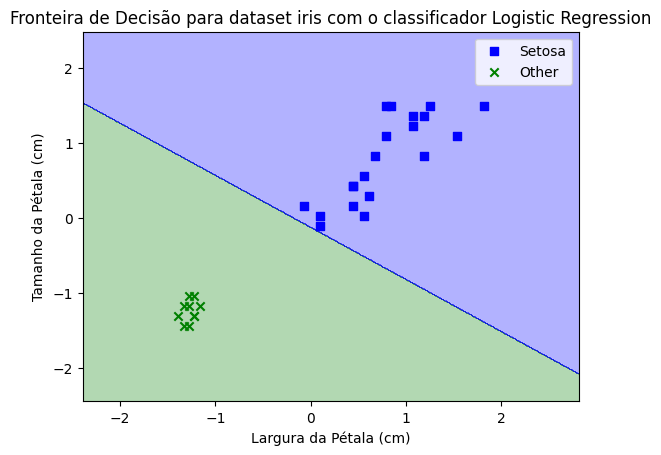

In [39]:
def plot_decision_boundary_logistic_regression(X, y, weights, threshold=0.4):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    y_pred = np.array(predict(grid, weights, threshold=threshold)).reshape(xx1.shape)

    custom_cmap = ListedColormap(['green', 'blue'])  # Custom colors for class 0 and class 1

    plt.contourf(xx1, xx2, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', marker='s', label='Setosa')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='g', marker='x', label='Other')
    plt.xlabel('Largura da Pétala (cm)')
    plt.ylabel('Tamanho da Pétala (cm)')
    plt.title('Fronteira de Decisão para dataset iris com o classificador Logistic Regression')
    plt.legend()
    plt.show()

# Plote a fronteira de decisão usando os dados de teste
plot_decision_boundary_logistic_regression(X_test, y_test, weights)

In [40]:
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

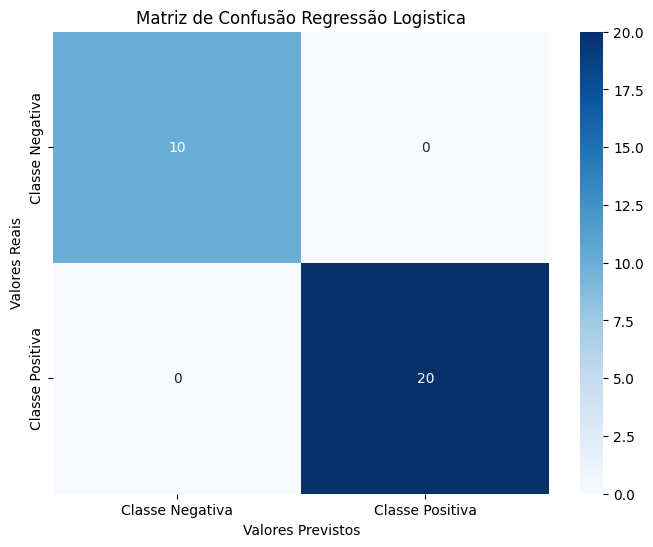

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão Regressão Logistica')
plt.show()

In [11]:
accuracy = ((TN + TP)/(TN + FP + TP + FN))
recall = ((TP)/(TP + FN))
precision = ((TP)/(TP + FP))
F1_score = (2 * ((precision * recall)/(precision + recall)))

In [12]:
metrics_lr = pd.DataFrame({
    'Metrica': ['Accuracy', 'Recall', 'Precision', 'F1_score'],
    'Valor': [accuracy, recall, precision, F1_score]
})
metrics_lr.style.set_caption('Regressão Logística')

,Metrica,Valor
0,Accuracy,0.966667
1,Recall,0.950000
2,Precision,1.000000
3,F1_score,0.974359


### Código para Análise do Discriminante Gaussiano

In [13]:
def calcular_media(valores):
    return sum(valores) / len(valores)

def matriz_covariancia(dados):
    num_colunas = len(dados[0])
    num_linhas = len(dados)

    medias = [calcular_media([dados[i][j] for i in range(num_linhas)]) for j in range(num_colunas)]
    matriz_covariancia = [[0] * num_colunas for _ in range(num_colunas)]
    for i in range(num_colunas):
        for j in range(num_colunas):
            soma_covariancia = 0
            for k in range(num_linhas):
                soma_covariancia += (dados[k][i] - medias[i]) * (dados[k][j] - medias[j])
            matriz_covariancia[i][j] = soma_covariancia / (num_linhas - 1)

    return matriz_covariancia


In [14]:
classe1_dados = X_train[y_train == 0]
classe2_dados = X_train[y_train == 1]

mu_chapeu_1 = calcular_media(classe1_dados)
mu_chapeu_2 = calcular_media(classe2_dados)
sigma_chapeu_1 = matriz_covariancia(classe1_dados)
sigma_chapeu_2 = matriz_covariancia(classe2_dados)

p_C1 = calcular_media(y_train == 0)
p_C2 = calcular_media(y_train == 1)

In [15]:
def classificador_adg(x, mu_chapeu_1, mu_chapeu_2, sigma_chapeu_1, sigma_chapeu_2, p_C1, p_C2):

    p_x_C1 = 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma_chapeu_1))) * np.exp(-0.5 * np.dot(np.dot((x - mu_chapeu_1).T, np.linalg.inv(sigma_chapeu_1)), (x - mu_chapeu_1)))
    p_x_C2 = 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma_chapeu_2))) * np.exp(-0.5 * np.dot(np.dot((x - mu_chapeu_2).T, np.linalg.inv(sigma_chapeu_2)), (x - mu_chapeu_2)))

    p_C1_x = p_x_C1 * p_C1
    p_C2_x = p_x_C2 * p_C2

    if p_C1_x > p_C2_x:
        return 0
    else:
        return 1

In [16]:
y_pred = [classificador_adg(x, mu_chapeu_1, mu_chapeu_2, sigma_chapeu_1, sigma_chapeu_2, p_C1, p_C2) for x in X_test]

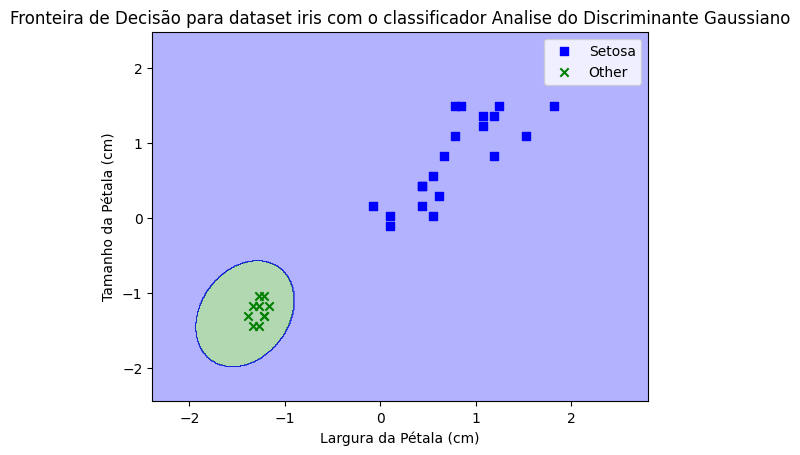

In [17]:
def plot_decision_boundary_adg(X, y, classifier):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]

    y_pred = np.array([classifier(point, mu_chapeu_1, mu_chapeu_2, sigma_chapeu_1, sigma_chapeu_2, p_C1, p_C2) for point in grid]).reshape(xx1.shape)

    custom_cmap = ListedColormap(['green', 'blue'])

    plt.contourf(xx1, xx2, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', marker='s', label='Setosa')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='g', marker='x', label='Other')
    plt.xlabel('Largura da Pétala (cm)')
    plt.ylabel('Tamanho da Pétala (cm)')
    plt.title('Fronteira de Decisão para dataset iris com o classificador Analise do Discriminante Gaussiano')
    plt.legend()
    plt.show()

plot_decision_boundary_adg(X_test, y_test, classificador_adg)


In [18]:
cm_adg = confusion_matrix(y_test, y_pred)

TN = cm_adg[0, 0]
FP = cm_adg[0, 1]
FN = cm_adg[1, 0]
TP = cm_adg[1, 1]

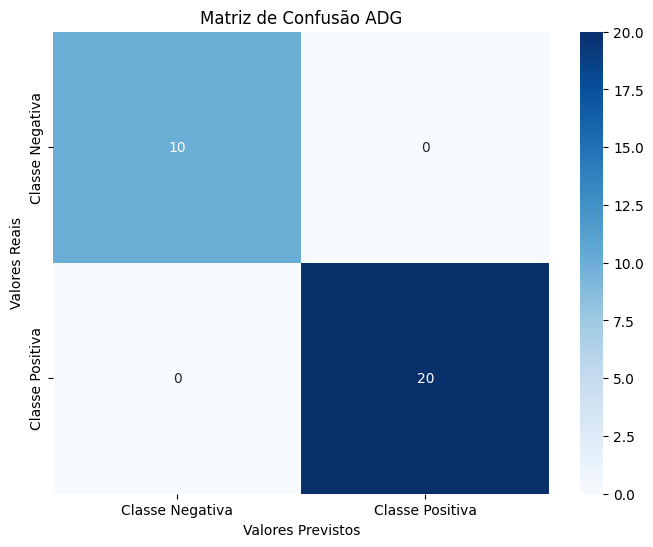

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adg, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão ADG')
plt.show()

In [20]:
accuracy = ((TN + TP)/(TN + FP + TP + FN))
recall = ((TP)/(TP + FN))
precision = ((TP)/(TP + FP))
F1_score = (2 * ((precision * recall)/(precision + recall)))

In [21]:
metrics_adg = pd.DataFrame({
    'Metrica': ['Accuracy', 'Recall', 'Precision', 'F1_score'],
    'Valor': [accuracy, recall, precision, F1_score]
})
metrics_adg.style.set_caption('Análise do Discriminante Gaussiano')

,Metrica,Valor
0,Accuracy,1.000000
1,Recall,1.000000
2,Precision,1.000000
3,F1_score,1.000000


### Código para o Naive Bayes Gaussiano


In [22]:
def calcular_variancia(dados):
    n = len(dados)
    if n == 0:
        return 0.0

    variancia = sum((x - calcular_media(dados)) ** 2 for x in dados) / (n - 1)
    return variancia

In [23]:
classe1_dados = X_train[y_train == 0]
classe2_dados = X_train[y_train == 1]

mu_chapeu_1 = calcular_media(classe1_dados)
mu_chapeu_2 = calcular_media(classe2_dados)
sigma_chapeu_1 = calcular_variancia(classe1_dados)
sigma_chapeu_2 = calcular_variancia(classe2_dados)


N = len(X_train)
p_C1 = len(classe1_dados) / N
p_C2 = len(classe2_dados) / N

def classificador_nbg(x, mu_chapeu_1, mu_chapeu_2, sigma_chapeu_1, sigma_chapeu_2, p_C1, p_C2):
    p_x_C1 = 1
    p_x_C2 = 1

    for d in range(len(x)):
        p_x_C1 *= 1 / (np.sqrt(2 * np.pi * sigma_chapeu_1[d])) * np.exp(-0.5 * ((x[d] - mu_chapeu_1[d]) ** 2) / sigma_chapeu_1[d])
        p_x_C2 *= 1 / (np.sqrt(2 * np.pi * sigma_chapeu_2[d])) * np.exp(-0.5 * ((x[d] - mu_chapeu_2[d]) ** 2) / sigma_chapeu_2[d])

    p_C1_x = p_x_C1 * p_C1
    p_C2_x = p_x_C2 * p_C2

    if p_C1_x > p_C2_x:
        return 0
    else:
        return 1

In [24]:
y_pred = [classificador_nbg(x, mu_chapeu_1, mu_chapeu_2, sigma_chapeu_1, sigma_chapeu_2, p_C1, p_C2) for x in X_test]

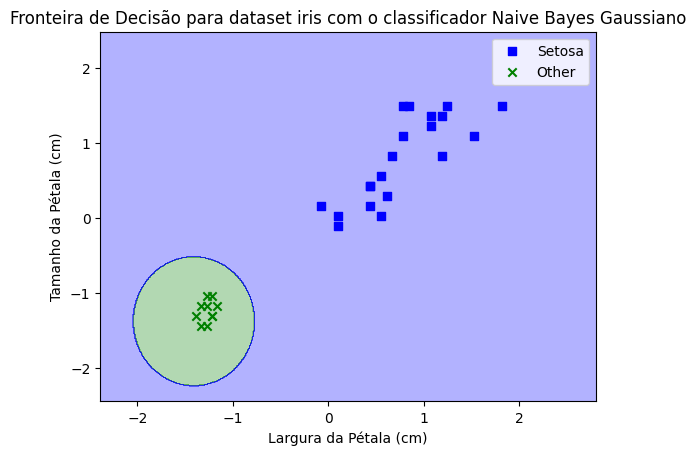

In [25]:
def plot_decision_boundary_nbg(X, y, classifier):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]

    y_pred = np.array([classifier(x, mu_chapeu_1, mu_chapeu_2, sigma_chapeu_1, sigma_chapeu_2, p_C1, p_C2) for x in grid]).reshape(xx1.shape)

    custom_cmap = ListedColormap(['green', 'blue'])

    plt.contourf(xx1, xx2, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', marker='s', label='Setosa')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='g', marker='x', label='Other')
    plt.xlabel('Largura da Pétala (cm)')
    plt.ylabel('Tamanho da Pétala (cm)')
    plt.title('Fronteira de Decisão para dataset iris com o classificador Naive Bayes Gaussiano')
    plt.legend()
    plt.show()

plot_decision_boundary_nbg(X_test, y_test, classificador_nbg)


In [26]:
cm_nbg = confusion_matrix(y_test, y_pred)

TN = cm_nbg[0, 0]
FP = cm_nbg[0, 1]
FN = cm_nbg[1, 0]
TP = cm_nbg[1, 1]

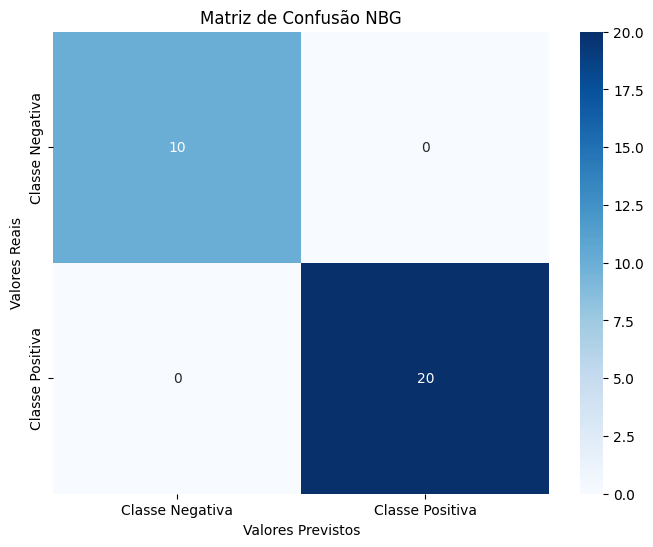

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nbg, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão NBG')
plt.show()

In [28]:
accuracy = ((TN + TP)/(TN + FP + TP + FN))
recall = ((TP)/(TP + FN))
precision = ((TP)/(TP + FP))
F1_score = (2 * ((precision * recall)/(precision + recall)))

In [29]:
metrics_nbg = pd.DataFrame({
    'Metrica': ['Accuracy', 'Recall', 'Precision', 'F1_score'],
    'Valor': [accuracy, recall, precision, F1_score]
})
metrics_nbg.style.set_caption('Nayve Bayes Gaussiano')

,Metrica,Valor
0,Accuracy,1.000000
1,Recall,1.000000
2,Precision,1.000000
3,F1_score,1.000000


### Código para o  KNN

In [30]:
def distancia_euclidiana(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))



def knn_predict(X_train, y_train, X_test, k):
    distancias = [(distancia_euclidiana(X_test, x), i) for i, x in enumerate(X_train)]
    distancias_ordenadas = sorted(distancias, key=lambda x: x[0])[:k]
    k_indices = [i for _, i in distancias_ordenadas]
    k_rotulos_mais_proximos = [y_train[i] for i in k_indices]

    contagem_classes = {}
    for rotulo in k_rotulos_mais_proximos:
        if rotulo in contagem_classes:
            contagem_classes[rotulo] += 1
        else:
            contagem_classes[rotulo] = 1

    y_pred = max(contagem_classes, key=lambda x: -contagem_classes[x])
    return y_pred


k = 3


In [31]:
y_pred = [knn_predict(X_train, y_train, x, k) for x in X_test]


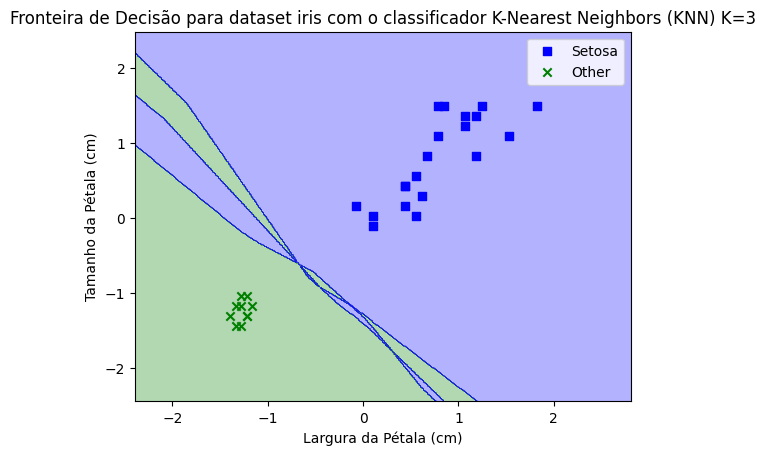

In [32]:
def plot_decision_boundary_knn(X_train, y_train, X, y, classifier, k):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    y_pred = np.array([classifier(X_train, y_train, x, k) for x in grid]).reshape(xx1.shape)

    custom_cmap = ListedColormap(['green', 'blue'])

    plt.contourf(xx1, xx2, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', marker='s', label='Setosa')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='g', marker='x', label='Other')
    plt.xlabel('Largura da Pétala (cm)')
    plt.ylabel('Tamanho da Pétala (cm)')
    plt.title('Fronteira de Decisão para dataset iris com o classificador K-Nearest Neighbors (KNN) K=3')
    plt.legend()
    plt.show()

plot_decision_boundary_knn(X_train, y_train, X_test, y_test, knn_predict, k)

In [33]:
cm_knn = confusion_matrix(y_test, y_pred)

TN = cm_knn[0, 0]
FP = cm_knn[0, 1]
FN = cm_knn[1, 0]
TP = cm_knn[1, 1]

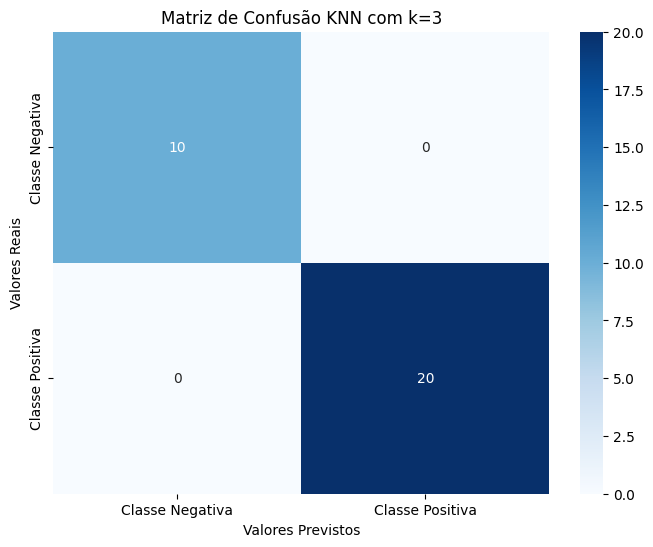

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão KNN com k=3')
plt.show()

In [35]:
accuracy = ((TN + TP)/(TN + FP + TP + FN))
recall = ((TP)/(TP + FN))
precision = ((TP)/(TP + FP))
F1_score = (2 * ((precision * recall)/(precision + recall)))

In [36]:
metrics_knn = pd.DataFrame({
    'Metrica': ['Accuracy', 'Recall', 'Precision', 'F1_score'],
    'Valor': [accuracy, recall, precision, F1_score]
})
metrics_knn.style.set_caption('K Nearest Neighbors')

,Metrica,Valor
0,Accuracy,1.000000
1,Recall,1.000000
2,Precision,1.000000
3,F1_score,1.000000
